# Download dataset

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

# Install kaggle API client
!pip install -q kaggle

# kaggle API client expects the file to be in ~/.kaggle
# so move it there
!mkdir -p ~/.kaggle
!cp /content/gdrive/MyDrive/kaggle.json ~/.kaggle/

# we need to set permissions
!chmod 600 /root/.kaggle/kaggle.json

# check your directory before downloading the datasets
!pwd

Mounted at /content/gdrive
/content


In [ ]:
!kaggle competitions download -c ss3-hackathon-online-iots-and-robotics

  0% 0.00/263k [00:00<?, ?B/s]
100% 263k/263k [00:00<00:00, 69.7MB/s]


In [ ]:
!unzip ss3-hackathon-online-iots-and-robotics.zip

Archive:  ss3-hackathon-online-iots-and-robotics.zip
  inflating: IOT_Submit.csv          
  inflating: IOT_Test.csv            
  inflating: IOT_Train.csv           


# Data understanding

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df.head()

,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
0,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-20 15:00:00+07:00,70.6,59.0,NaN,NaN,0.0,45.0,4.3,32.6
1,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-16 09:00:00+07:00,62.3,76.0,NaN,NaN,0.0,45.0,1.9,37.9
2,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-06-26 19:00:00+07:00,90.3,0.0,NaN,NaN,0.0,135.0,3.2,26.4
3,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-16 04:00:00+07:00,91.7,0.0,NaN,NaN,0.0,157.5,0.0,25.6
4,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-30 08:00:00+07:00,59.1,71.0,NaN,NaN,0.0,180.0,2.3,36.2


In [ ]:
df.tail()

,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
13630,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-06-14 01:00:00+07:00,97.9,0.0,NaN,NaN,4.2,0.0,0.0,23.5
13631,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-05-03 02:00:00+07:00,80.6,0.0,NaN,NaN,0.0,135.0,2.9,19.3
13632,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-05-19 06:00:00+07:00,87.9,37.0,NaN,NaN,0.0,45.0,3.0,24.5
13633,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-06-15 02:00:00+07:00,89.9,0.0,NaN,NaN,0.0,315.0,0.0,27.3
13634,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-06-05 18:00:00+07:00,66.3,43.0,NaN,NaN,0.0,45.0,0.8,33.5


In [ ]:
df.dtypes

mac               object
station_name      object
tambon_code        int64
tambon_namt       object
amphur_code        int64
amphur_namt       object
province_code      int64
province_namt     object
latitude         float64
longitude        float64
time              object
humid            float64
light            float64
pm10             float64
pm2.5            float64
rainfall         float64
wind_direct      float64
wind_speed       float64
temp             float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13635 entries, 0 to 13634
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mac            13635 non-null  object 
 1   station_name   13635 non-null  object 
 2   tambon_code    13635 non-null  int64  
 3   tambon_namt    13635 non-null  object 
 4   amphur_code    13635 non-null  int64  
 5   amphur_namt    13635 non-null  object 
 6   province_code  13635 non-null  int64  
 7   province_namt  13635 non-null  object 
 8   latitude       13635 non-null  float64
 9   longitude      13635 non-null  float64
 10  time           13635 non-null  object 
 11  humid          13635 non-null  float64
 12  light          13635 non-null  float64
 13  pm10           6841 non-null   float64
 14  pm2.5          6841 non-null   float64
 15  rainfall       13635 non-null  float64
 16  wind_direct    13635 non-null  float64
 17  wind_speed     13635 non-null  float64
 18  temp  

In [ ]:
df.describe()

,tambon_code,amphur_code,province_code,latitude,longitude,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
count,13635.000000,13635.000000,13635.000000,13635.000000,13635.000000,13635.000000,13635.000000,6841.000000,6841.000000,13635.000000,13635.000000,13635.000000,13634.000000
mean,452665.897543,4526.625376,45.179391,15.498114,101.728711,80.428258,33.196553,7.657652,6.449203,0.135827,161.854785,4.533869,29.083827
std,213925.103701,2139.240731,21.448269,2.345306,2.180078,12.442925,34.509041,8.449023,8.415738,1.112371,100.338928,181.668659,4.344476
min,102601.000000,1026.000000,10.000000,10.579849,98.573417,40.900000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.200000
25%,300903.000000,3009.000000,30.000000,14.533026,100.569662,71.000000,0.000000,3.000000,2.000000,0.000000,45.000000,0.000000,25.800000
50%,380704.000000,3807.000000,38.000000,16.494229,102.052114,82.400000,16.000000,6.000000,4.000000,0.000000,180.000000,1.400000,28.100000
75%,550404.000000,5504.000000,55.000000,18.142499,104.350891,90.600000,68.000000,10.000000,9.000000,0.000000,225.000000,3.400000,31.700000
max,860206.000000,8602.000000,86.000000,18.241106,104.495172,100.000000,96.000000,368.000000,368.000000,34.100000,337.500000,15094.300000,51.100000


In [ ]:
df['latitude']

0        15.112831
1        15.112831
2        15.112831
3        15.112831
4        15.112831
           ...    
13630    16.494229
13631    16.494229
13632    16.494229
13633    16.494229
13634    16.494229
Name: latitude, Length: 13635, dtype: float64

In [ ]:
df.isnull().sum()

mac                 0
station_name        0
tambon_code         0
tambon_namt         0
amphur_code         0
amphur_namt         0
province_code       0
province_namt       0
latitude            0
longitude           0
time                0
humid               0
light               0
pm10             6794
pm2.5            6794
rainfall            0
wind_direct         0
wind_speed          0
temp                1
dtype: int64

In [ ]:
df.columns

Index(['mac', 'station_name', 'tambon_code', 'tambon_namt', 'amphur_code',
       'amphur_namt', 'province_code', 'province_namt', 'latitude',
       'longitude', 'time', 'humid', 'light', 'pm10', 'pm2.5', 'rainfall',
       'wind_direct', 'wind_speed', 'temp'],
      dtype='object')

In [ ]:
columns1 = ['humid', 'light', 'rainfall', 'wind_speed', 'temp']
df1 = df[columns1]

In [ ]:
columns = ['time', 'latitude', 'humid', 'light', 'rainfall', 'wind_direct', 'wind_speed', 'temp']
df = df[columns]

In [ ]:
df.head()

,time,latitude,humid,light,rainfall,wind_direct,wind_speed,temp
0,2022-07-20 15:00:00+07:00,15.112831,70.6,59.0,0.0,45.0,4.3,32.6
1,2022-05-16 09:00:00+07:00,15.112831,62.3,76.0,0.0,45.0,1.9,37.9
2,2022-06-26 19:00:00+07:00,15.112831,90.3,0.0,0.0,135.0,3.2,26.4
3,2022-07-16 04:00:00+07:00,15.112831,91.7,0.0,0.0,157.5,0.0,25.6
4,2022-05-30 08:00:00+07:00,15.112831,59.1,71.0,0.0,180.0,2.3,36.2


# Data Exploring

## Deal with missing values

In [ ]:
df.isnull().sum()

time           0
latitude       0
humid          0
light          0
rainfall       0
wind_direct    0
wind_speed     0
temp           1
dtype: int64

In [ ]:
df.shape

(13635, 8)

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.shape

(13634, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13634 entries, 0 to 13634
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         13634 non-null  object 
 1   latitude     13634 non-null  float64
 2   humid        13634 non-null  float64
 3   light        13634 non-null  float64
 4   rainfall     13634 non-null  float64
 5   wind_direct  13634 non-null  float64
 6   wind_speed   13634 non-null  float64
 7   temp         13634 non-null  float64
dtypes: float64(7), object(1)
memory usage: 958.6+ KB


## Visualize data


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['time'].value_counts()

2022-07-28 09:00:00+07:00    8
2022-05-03 00:00:00+07:00    8
2022-05-04 03:00:00+07:00    8
2022-07-10 08:00:00+07:00    8
2022-05-14 20:00:00+07:00    8
                            ..
2022-07-27 09:00:00+07:00    1
2022-07-31 16:00:00+07:00    1
2022-07-31 08:00:00+07:00    1
2022-07-05 12:00:00+07:00    1
2022-07-29 19:00:00+07:00    1
Name: time, Length: 2178, dtype: int64

In [ ]:
df['time'].dtype, df['latitude'].dtype

(dtype('O'), dtype('float64'))

In [ ]:
d = df['time'].str[8:10].astype(int)
m = df['time'].str[5:7].astype(int)
t = df['time'].str[11:13].astype(int)
d, m, t

(0        20
 1        16
 2        26
 3        16
 4        30
          ..
 13630    14
 13631     3
 13632    19
 13633    15
 13634     5
 Name: time, Length: 13634, dtype: int64, 0        7
 1        5
 2        6
 3        7
 4        5
         ..
 13630    6
 13631    5
 13632    5
 13633    6
 13634    6
 Name: time, Length: 13634, dtype: int64, 0        15
 1         9
 2        19
 3         4
 4         8
          ..
 13630     1
 13631     2
 13632     6
 13633     2
 13634    18
 Name: time, Length: 13634, dtype: int64)

In [ ]:
t.value_counts()

20    581
18    580
13    579
4     576
10    575
0     575
11    575
12    574
14    571
2     570
22    569
1     569
5     568
7     568
17    568
16    566
3     565
21    565
15    563
6     562
23    559
8     557
19    552
9     547
Name: time, dtype: int64

In [ ]:
df.drop(['time'], axis=1)

,latitude,humid,light,rainfall,wind_direct,wind_speed,temp
0,15.112831,70.6,59.0,0.0,45.0,4.3,32.6
1,15.112831,62.3,76.0,0.0,45.0,1.9,37.9
2,15.112831,90.3,0.0,0.0,135.0,3.2,26.4
3,15.112831,91.7,0.0,0.0,157.5,0.0,25.6
4,15.112831,59.1,71.0,0.0,180.0,2.3,36.2
...,...,...,...,...,...,...,...
13630,16.494229,97.9,0.0,4.2,0.0,0.0,23.5
13631,16.494229,80.6,0.0,0.0,135.0,2.9,19.3
13632,16.494229,87.9,37.0,0.0,45.0,3.0,24.5
13633,16.494229,89.9,0.0,0.0,315.0,0.0,27.3


In [ ]:
df['date'] = d
df['month'] = m
df['hour'] = t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df = df.drop('time', axis=1)

In [ ]:
df.columns

Index(['time', 'latitude', 'humid', 'light', 'rainfall', 'wind_direct',
       'wind_speed', 'temp', 'date', 'month', 'hour'],
      dtype='object')

In [ ]:
columns = ['latitude', 'humid', 'light', 'rainfall',
       'wind_speed', 'month', 'hour', 'temp']
df = df[columns]

In [ ]:
df

,latitude,humid,light,rainfall,wind_speed,month,hour,temp
0,15.112831,70.6,59.0,0.0,4.3,7,15,32.6
1,15.112831,62.3,76.0,0.0,1.9,5,9,37.9
2,15.112831,90.3,0.0,0.0,3.2,6,19,26.4
3,15.112831,91.7,0.0,0.0,0.0,7,4,25.6
4,15.112831,59.1,71.0,0.0,2.3,5,8,36.2
...,...,...,...,...,...,...,...,...
13630,16.494229,97.9,0.0,4.2,0.0,6,1,23.5
13631,16.494229,80.6,0.0,0.0,2.9,5,2,19.3
13632,16.494229,87.9,37.0,0.0,3.0,5,6,24.5
13633,16.494229,89.9,0.0,0.0,0.0,6,2,27.3


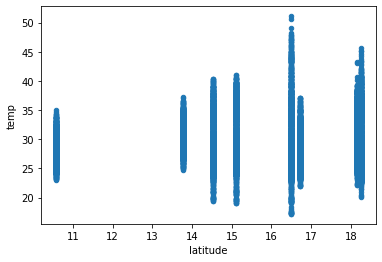

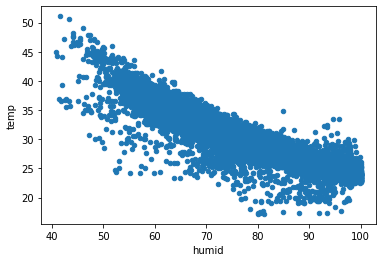

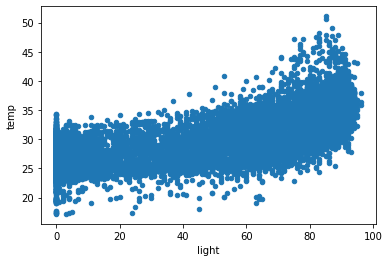

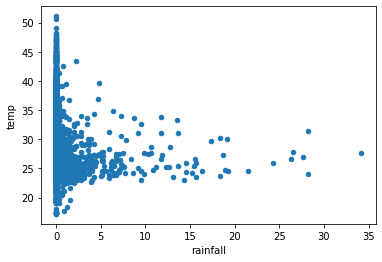

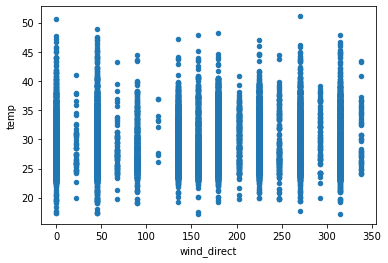

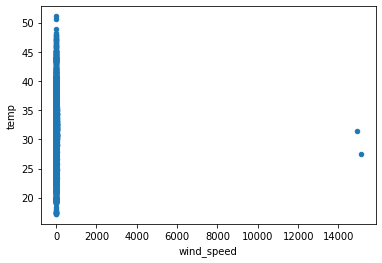

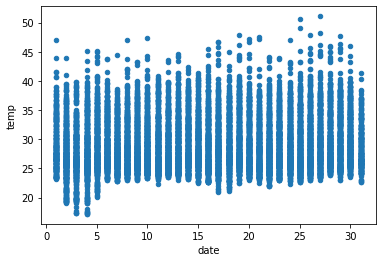

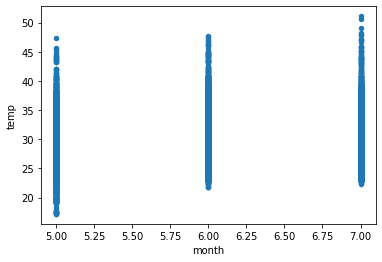

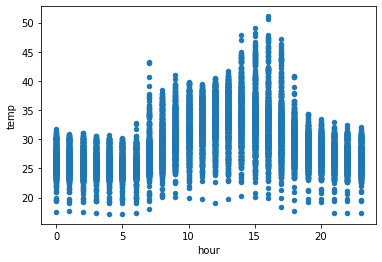

In [ ]:
for c in columns[:-1]:
  df.plot.scatter(x=c, y="temp", use_index=True)
plt.show()

### sns


In [ ]:
import seaborn as sns

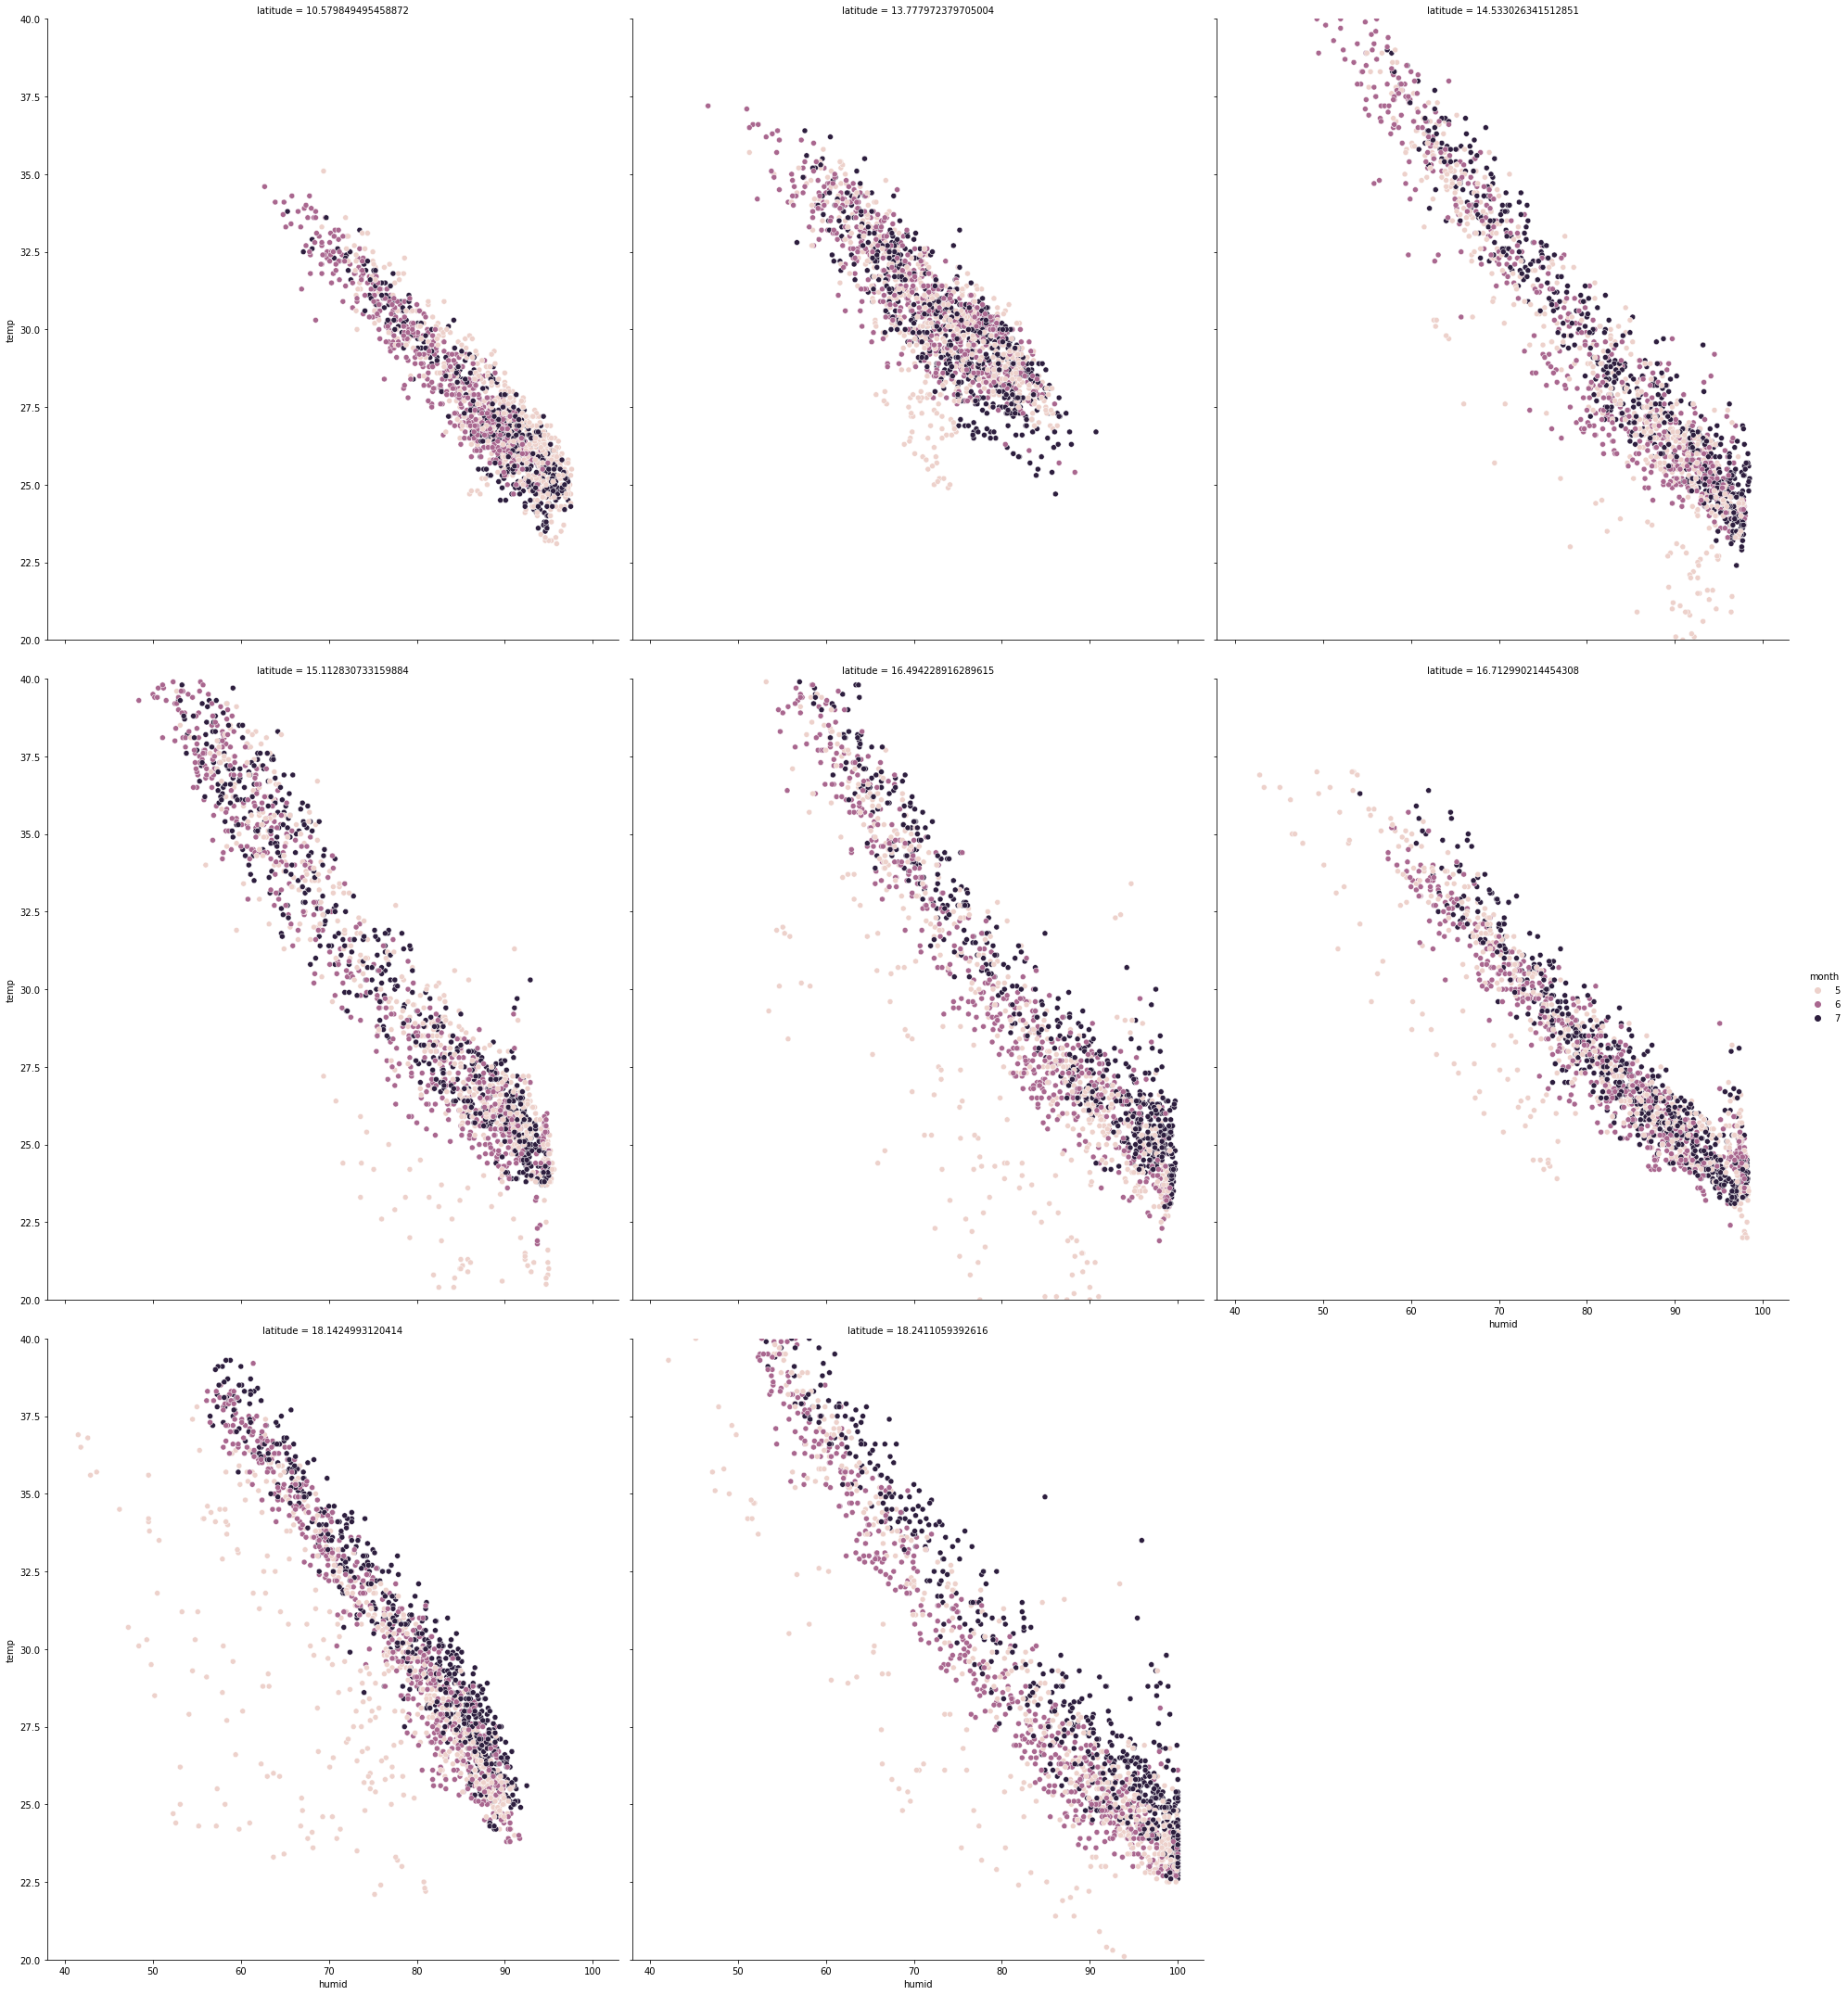

In [ ]:
g = sns.relplot(
    data=df,
    x="humid", y="temp", col="latitude",
    hue='month',
    col_wrap=3, height=10, aspect=0.9,
)
g.set(ylim=(20, 40))

In [ ]:
def make_facetgrid(c):
    g = sns.relplot(
      data=df,
      x=c, y="temp", col="latitude",
      hue='month',
      col_wrap=3, height=10, aspect=0.9,
    )
    g.set(ylim=(20, 40))

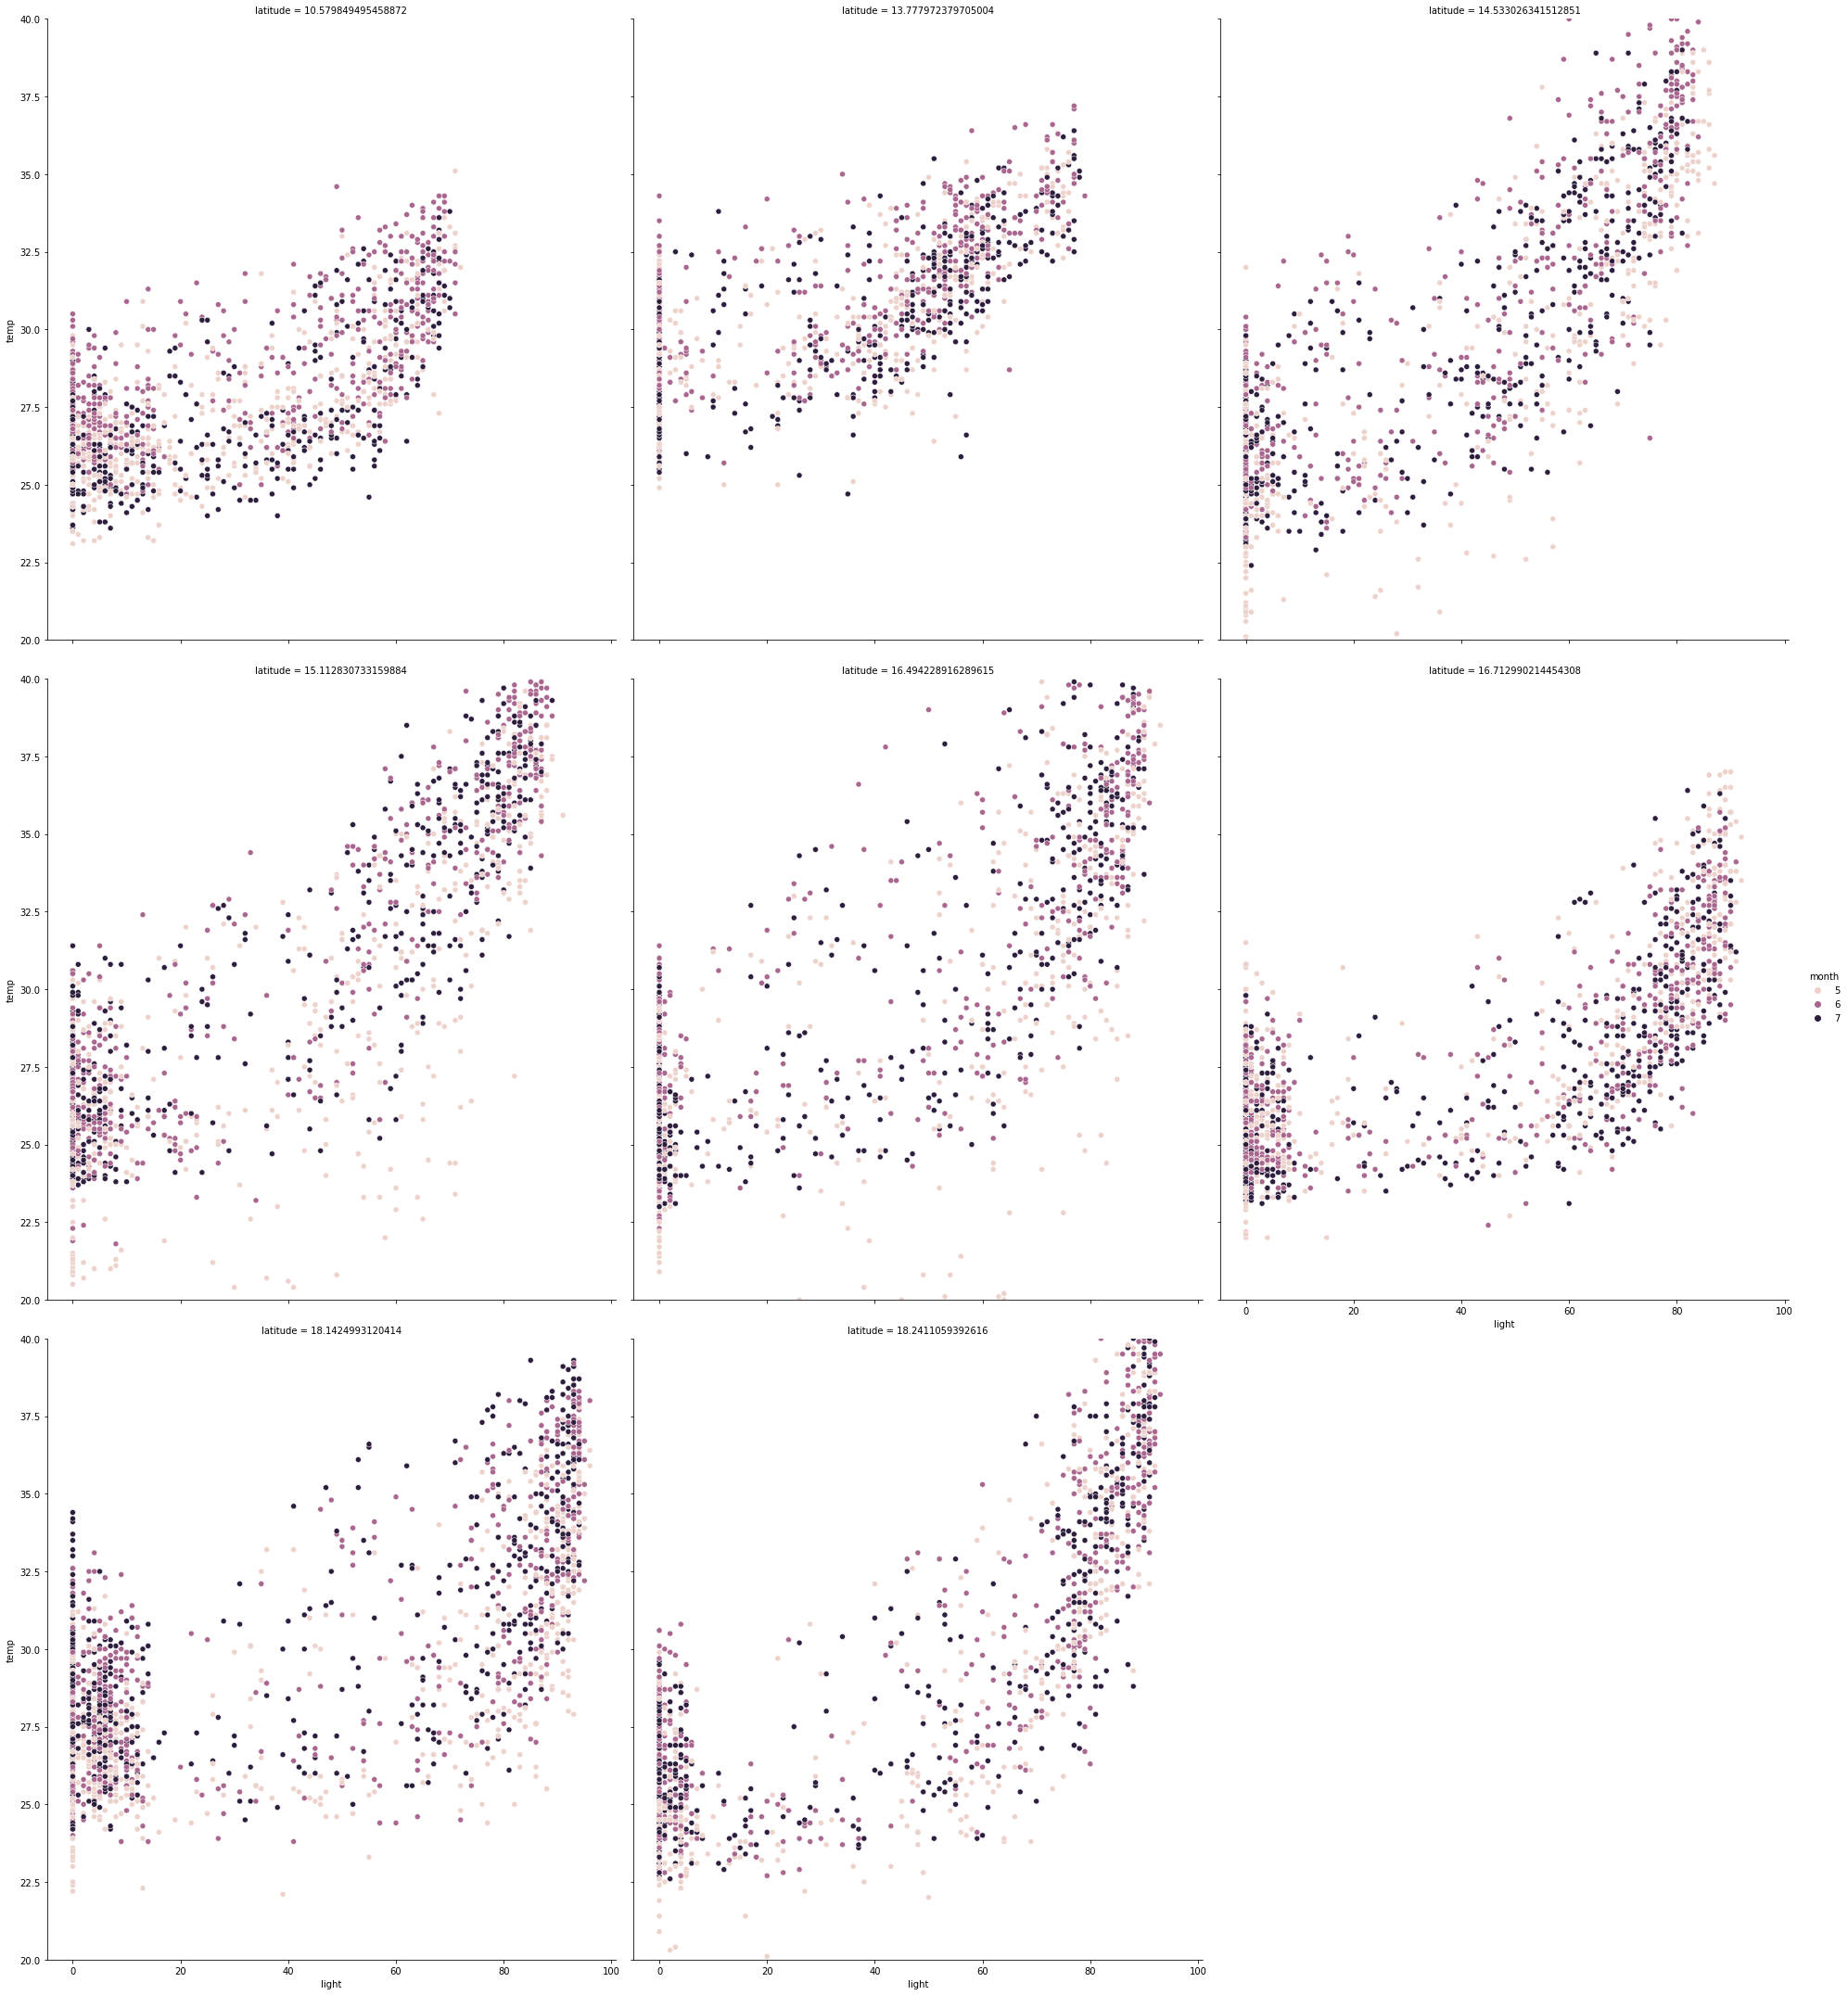

In [ ]:
make_facetgrid("light")

# Data preprocessing

## Split dataset and scale

In [ ]:
x = df.drop(['temp'], axis=1)
y = df['temp']
x, y

(        latitude  humid  light  rainfall  wind_speed  month  hour
 0      15.112831   70.6   59.0       0.0         4.3      7    15
 1      15.112831   62.3   76.0       0.0         1.9      5     9
 2      15.112831   90.3    0.0       0.0         3.2      6    19
 3      15.112831   91.7    0.0       0.0         0.0      7     4
 4      15.112831   59.1   71.0       0.0         2.3      5     8
 ...          ...    ...    ...       ...         ...    ...   ...
 13630  16.494229   97.9    0.0       4.2         0.0      6     1
 13631  16.494229   80.6    0.0       0.0         2.9      5     2
 13632  16.494229   87.9   37.0       0.0         3.0      5     6
 13633  16.494229   89.9    0.0       0.0         0.0      6     2
 13634  16.494229   66.3   43.0       0.0         0.8      6    18
 
 [13634 rows x 7 columns], 0        32.6
 1        37.9
 2        26.4
 3        25.6
 4        36.2
          ... 
 13630    23.5
 13631    19.3
 13632    24.5
 13633    27.3
 13634    33.5
 Na

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13634 entries, 0 to 13634
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    13634 non-null  float64
 1   humid       13634 non-null  float64
 2   light       13634 non-null  float64
 3   rainfall    13634 non-null  float64
 4   wind_speed  13634 non-null  float64
 5   month       13634 non-null  int64  
 6   hour        13634 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.3 MB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 123)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, random_state = 123, test_size=0.5)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

## Encoding

## Wind direction


In [ ]:
df['wind_direct'] # angle

0         45.0
1         45.0
2        135.0
3        157.5
4        180.0
         ...  
13630      0.0
13631    135.0
13632     45.0
13633    315.0
13634     45.0
Name: wind_direct, Length: 13635, dtype: float64

In [ ]:
%%html
<img src="https://halvorsen.blog/pictures/software/weather/Wind%20Directions.png"/>

## Manage time column ordinal encoding (optional)

In [ ]:
df['time']

0        2022-07-20 15:00:00+07:00
1        2022-05-16 09:00:00+07:00
2        2022-06-26 19:00:00+07:00
3        2022-07-16 04:00:00+07:00
4        2022-05-30 08:00:00+07:00
                   ...            
13630    2022-06-14 01:00:00+07:00
13631    2022-05-03 02:00:00+07:00
13632    2022-05-19 06:00:00+07:00
13633    2022-06-15 02:00:00+07:00
13634    2022-06-05 18:00:00+07:00
Name: time, Length: 13635, dtype: object

# Use tambon 1-hot (maybe ordinal)

In [ ]:
df['station_name'].unique(), df['tambon_code'].unique(), df['amphur_code'].unique()

(array(['บ้านนา_2', 'บ้านนาสะแบง_2', 'บ้านสำโรงเกียรติ_2',
        'โรงเรียนท่าข้ามวิทยา', 'โรงเรียนบ้านนา', 'โรงเรียนสรรพวิทยาคม',
        'โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล)',
        'โรงเรียนหนองสูงสามัคคีวิทยา_2'], dtype=object),
 array([300903, 380704, 330802, 860206, 550404, 630601, 102601, 490706]),
 array([3009, 3807, 3308, 8602, 5504, 6306, 1026, 4907]))

In [ ]:
df['station_name'].unique().size, df['tambon_code'].unique().size

(8, 8)

In [ ]:
df['pm10']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
13630   NaN
13631   NaN
13632   NaN
13633   NaN
13634   NaN
Name: pm10, Length: 13635, dtype: float64

In [ ]:
df.shape

(13635, 19)

In [ ]:
# titanic[(titanic["Pclass"] == 2)
df[(df['pm10'].notnull())]


,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
17,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-09 16:00:00+07:00,82.7,45.0,1.0,0.0,0.0,22.5,3.0,28.5
41,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-30 13:00:00+07:00,59.8,83.0,1.0,0.0,0.0,180.0,4.3,38.5
47,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-30 12:00:00+07:00,58.4,83.0,1.0,0.0,0.0,135.0,2.3,39.2
190,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-18 08:00:00+07:00,58.6,70.0,1.0,0.0,0.0,225.0,6.4,37.1
265,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-24 13:00:00+07:00,57.5,85.0,1.0,0.0,0.0,0.0,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13546,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-06-21 01:00:00+07:00,76.9,0.0,1.0,0.0,0.0,292.5,1.1,28.7
13575,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-06-22 16:00:00+07:00,49.7,80.0,1.0,0.0,0.0,45.0,1.4,42.4
13586,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-06-22 06:00:00+07:00,82.5,50.0,1.0,0.0,0.0,0.0,0.0,27.3
13589,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-07-15 15:00:00+07:00,64.3,63.0,1.0,0.0,0.0,315.0,1.0,37.1


In [ ]:
df.isnull().sum()

mac                 0
station_name        0
tambon_code         0
tambon_namt         0
amphur_code         0
amphur_namt         0
province_code       0
province_namt       0
latitude            0
longitude           0
time                0
humid               0
light               0
pm10             6794
pm2.5            6794
rainfall            0
wind_direct         0
wind_speed          0
temp                1
dtype: int64


# Train model

In [ ]:
from sklearn.linear_model import ElasticNetCV, RidgeCV, ElasticNet, Ridge, SGDRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

print(cross_val_score(Ridge(), x_train_scaled, y_train, scoring='neg_mean_absolute_error'))
print(cross_val_score(SGDRegressor(), x_train_scaled, y_train, scoring='neg_mean_absolute_error'))
print(cross_val_score(ElasticNet(), x_train_scaled, y_train, scoring='neg_mean_absolute_error'))
print(cross_val_score(ElasticNetCV(), x_train_scaled, y_train, scoring='neg_mean_absolute_error', ))

[-1.16646248 -1.19058044 -1.1825672  -1.20174587 -1.19258567]
[-13184.09453039   -102.63605034   -100.17095774 -26305.63121197
 -19761.23580612]
[-1.61786624 -1.6225046  -1.59191517 -1.63532048 -1.64364786]
[-1.16492247 -1.18903161 -1.18042238 -1.20042375 -1.19148167]


In [ ]:
print(cross_val_score(RandomForestRegressor(), x_train_scaled, y_train, scoring='neg_mean_absolute_error'))
print(cross_val_score(GradientBoostingRegressor(), x_train_scaled, y_train, scoring='neg_mean_absolute_error'))
print(cross_val_score(XGBRegressor(), x_train_scaled, y_train, scoring='neg_mean_absolute_error'))

[-0.82318419 -0.86477609 -0.82647761 -0.83656222 -0.85637614]
[-0.85052575 -0.89098742 -0.89277515 -0.88436856 -0.91606564]
[05:00:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[-0.85421141 -0.89658151 -0.8902275  -0.88973985 -0.92103933]


In [ ]:
# Metric: Mean Absolute Error (MAE)
parameters = {'min_samples_leaf':(1,5,10),'min_samples_split':(2,5,10)}
clf = GridSearchCV(RandomForestRegressor(), parameters,scoring='neg_mean_absolute_error', cv=10)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': (1, 5, 10),
                         'min_samples_split': (2, 5, 10)},
             scoring='neg_mean_absolute_error')

In [ ]:
model = clf.best_estimator_

In [ ]:
XGBRegressor().get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
parameters = {'max_depth': (10,15), 'max_leaves': (0,5,10)}
clf = GridSearchCV(XGBRegressor(), parameters,scoring='neg_mean_absolute_error', cv=10)
clf.fit(x_train_scaled, y_train)

In [ ]:
model2 = clf.best_estimator_

In [ ]:
model2.get_params()

In [ ]:
parameters = {'max_depth': (10,15), 'max_leaves': (0,5,10)}
clf = GridSearchCV(XGBRegressor(booster='gblinear'), parameters,scoring='neg_mean_absolute_error', cv=10)
clf.fit(x_train_scaled, y_train)

In [ ]:
model3 = clf.best_estimator_

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_val,model.predict(x_val_scaled)))
print(mean_absolute_error(y_val,model2.predict(x_val_scaled)))
print(mean_absolute_error(y_val,model3.predict(x_val_scaled)))

0.7949304913358838
0.7890272115332638
1.7130157772746604


In [ ]:
print(mean_absolute_error(y_test,model.predict(x_test_scaled)))
print(mean_absolute_error(y_test,model2.predict(x_test_scaled)))

0.8630405191901723
0.8248229552259886


# Submit

In [ ]:
sub = pd.read_csv("IOT_Test.csv")

In [ ]:
columns.append('temp')

In [ ]:
columns

['latitude',
 'humid',
 'light',
 'rainfall',
 'wind_speed',
 'month',
 'hour',
 'temp']

In [ ]:
sub['month'] = sub['time'].str[5:7].astype(int)
sub['hour'] = sub['time'].str[11:13].astype(int)
sub = sub.drop('time', axis=1)

In [ ]:
id = sub['id']
sub = sub[columns[:-1]]
sub_scaled = scaler.transform(sub)
sub_scaled

array([[-1.62638165e-01,  6.84755167e-01, -9.34467235e-01, ...,
        -1.36680396e-02, -1.21890121e+00, -1.09012100e+00],
       [-1.62638165e-01,  3.70348541e-01,  1.95482567e-01, ...,
        -1.76069080e-02, -1.21890121e+00,  6.42644747e-01],
       [-1.62638165e-01,  6.84755167e-01, -7.60628804e-01, ...,
        -2.49922863e-02, -8.93376974e-04, -1.23451815e+00],
       ...,
       [ 4.26535452e-01,  4.91274166e-01, -9.05494163e-01, ...,
        -2.20381350e-02, -1.21890121e+00,  1.50902762e+00],
       [ 4.26535452e-01,  1.29744500e+00, -9.63440307e-01, ...,
        -2.49922863e-02,  1.21711445e+00, -1.52331244e+00],
       [ 4.26535452e-01, -1.33873363e+00,  1.55721694e+00, ...,
        -2.30228521e-02, -8.93376974e-04, -7.93409825e-02]])

In [ ]:
result = model2.predict(sub_scaled)
result

array([24.455353, 26.367216, 25.657663, ..., 26.292103, 25.188738,
       36.11316 ], dtype=float32)

In [ ]:
rdf = pd.DataFrame(result, columns=['temp'])
rdf

,temp
0,24.455353
1,26.367216
2,25.657663
3,30.081411
4,34.910526
...,...
3408,26.452061
3409,31.200184
3410,26.292103
3411,25.188738


In [ ]:
rdf['id'] = id
rdf = rdf[['id', 'temp']]
rdf

,id,temp
0,1,24.455353
1,2,26.367216
2,3,25.657663
3,4,30.081411
4,5,34.910526
...,...,...
3408,3409,26.452061
3409,3410,31.200184
3410,3411,26.292103
3411,3412,25.188738


In [ ]:
rdf.to_csv("IoT_Submit_2_1.csv", index=False)

In [ ]:
pd.read_csv("IoT_Submit_2_1.csv")

,id,temp
0,1,24.455353
1,2,26.367216
2,3,25.657663
3,4,30.081411
4,5,34.910526
...,...,...
3408,3409,26.452060
3409,3410,31.200184
3410,3411,26.292103
3411,3412,25.188738


In [ ]:
# !kaggle competitions submit -c ss3-hackathon-online-iots-and-robotics -f IoT_Submit_2_1.csv -m "ซุย XGBoost"

100% 48.1k/48.1k [00:00<00:00, 57.6kB/s]
Successfully submitted to Hackathon Online: IoTs and Robotics